# Open Food Facts Course Project - Cleaning, manipulating and visualizing

First of all, let's import usefull libraries for the project and make matplolib displaying graphs inline the Notebook.

In [1]:
from os import path # For filepath manipulation
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

Next step will be to load the Open Food Facts CSV file, which in fact is a TSV file (Cells are separated with tabs).
Loading this file will take a consequent amount of time, as the file is 1Gb big. First thing to do will be to perform some cleanup and removal of useless columns, and save the result as a new CSV file.

This new CSV file will be used as datasource in this Notebook using the first **MAX_ENTRY_TO_LOAD** rows, goal is to reduce time processing while coding. The loading process of the big CSV file will be skipped using the **LOAD_BIG_FILE** boolean parameter. If set to **TRUE**, the Notebook will load data from the big CSV file, otherwise, it will use the smaller one created by the Notebook itself. In case **LOAD_BIG_FILE** is set to **FALSE** and the smaller file does not exists, the biggewr CSV file is used to rebuild the smaller one.

* Note that I've set the **low_memory** option to False in order to avoid warnings when loading the file. Number of columns is quite important and the process to determine the column dtype is too consuming*



## A. Importing and cleaning the data using the **LOAD_BIG_FILE** mechanism

### Import
Importing the datasource is done using Pandas **read_csv** method, using parameter **sep="\t"** as the content of the file is a tabulation spearated CSV file.

* Note that I've set the **low_memory** option to False in order to avoid warnings when loading the file. Number of columns is quite important and the process to determine the column dtype is too consuming*

### Clean
Looking at the loaded datasource using the **info()** method, I've found many columns having very few values (lot of NaN). First action would be to *drop* columns where the percentage of NaN value is over **MIN_PERCENT_VALUES**.

After this first big cleanup, I've decided to use the **product_name** column as the index of my Datasource, so any duplicated rows in this column will be dropped.


In [148]:
LOAD_BIG_FILE = True
BIG_CSV_FILENAME = path.join('data','OpenFoodFacts.tsv')
MIN_PERCENT_VALUES = 0.4
COLUMNS_TO_DROP = ['creator',
                          'brands',
                          'brands_tags',
                          'categories',
                          'main_category',
                          'countries',
                          'countries_tags',
                          'additives',
                          'additives_tags',
                          'categories_tags',
                          'states',
                          'states_en',
                          'states_tags',
                          'url',
                          'quantity',
                          'packaging_tags',
                          'packaging',
                          'created_t',
                          'last_modified_t',
                          'ingredients_from_palm_oil_n', 
                          'ingredients_that_may_be_from_palm_oil_n',
                          'pnns_groups_1',
                          'pnns_groups_2',
                          'image_url',
                          'image_small_url',
                         ]
SMALL_CSV_FILENAME = path.join('data','OpenFoodFacts-small.csv')
MAX_ENTRY_TO_LOAD = 10000

if (LOAD_BIG_FILE == True) or path.exists(SMALL_CSV_FILENAME) == False:
    print("Loading data from file",BIG_CSV_FILENAME)
    print("Please wait...")
    df = pd.read_csv(BIG_CSV_FILENAME,sep="\t",low_memory=False)
    print("Loading process terminated. Now clean the data...")

    # Drop rows with empty product_name or countries_en
    df = df.loc[:, (df.isnull().mean(axis=0) < MIN_PERCENT_VALUES)]
    df = df[np.logical_and(np.logical_not(df['product_name'].isnull()),np.logical_not(df['countries_en'].isnull()))]

    # Drop duplicated rows in column product_name
    df.drop_duplicates(subset=['product_name'],inplace=True)
    
    # Set product_name as dataframe Index
    df.set_index(keys='product_name',inplace=True)
    
    # Drop unused columns
    df.drop(COLUMNS_TO_DROP,axis = 1,inplace=True)
    
    print("Cleaning process terminated. Dumping the resulting Dataframe into file",SMALL_CSV_FILENAME)
    print("Please wait...")
    df.to_csv(SMALL_CSV_FILENAME)

print("Loading the first",MAX_ENTRY_TO_LOAD,"rows from the small dataset using file",SMALL_CSV_FILENAME)
print("Please wait...")
df = pd.read_csv(SMALL_CSV_FILENAME,low_memory=False, nrows=MAX_ENTRY_TO_LOAD, index_col=0)


    
print("Dataframe loaded")

Loading data from file data/OpenFoodFacts.tsv
Please wait...
Loading process terminated. Now clean the data...


KeyError: "['categories' 'main_category' 'additives_tags' 'categories_tags'\n 'quantity' 'packaging_tags' 'packaging' 'pnns_groups_1' 'pnns_groups_2'\n 'image_url' 'image_small_url'] not found in axis"

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249065 entries, Farine de blé noir to Tomates aux Vermicelles 
Data columns (total 31 columns):
creator                                    249063 non-null object
created_t                                  249065 non-null object
created_datetime                           249062 non-null object
last_modified_t                            249065 non-null object
last_modified_datetime                     249065 non-null object
brands                                     237619 non-null object
brands_tags                                237601 non-null object
countries                                  249065 non-null object
countries_tags                             249065 non-null object
countries_en                               249065 non-null object
ingredients_text                           202768 non-null object
serving_size                               149175 non-null object
additives_n                                202764 non-null float64


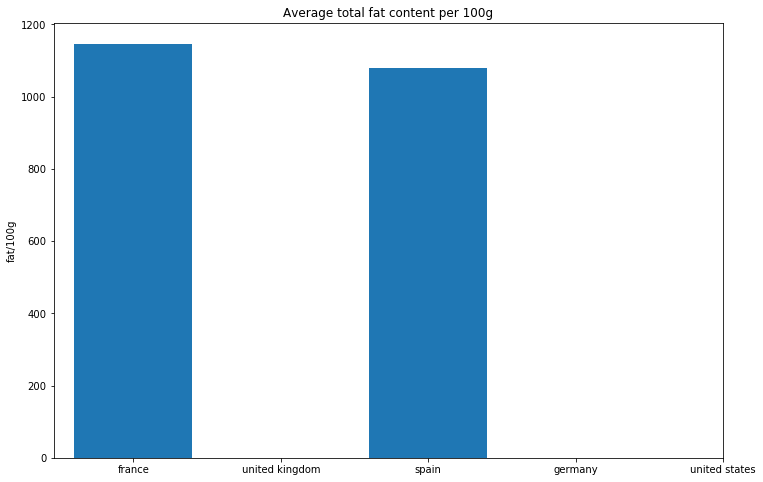

In [146]:
fat=[]
# Loop through all top five countries
top_countries = ['france','united kingdom','spain','germany','united states' ]
for country in top_countries:
    fat.append(getattr(df[df.countries==country], 'energy_100g').mean())
y_pos = np.arange(len(top_countries))
fig=plt.figure(figsize=(12,8))
plt.bar(y_pos,fat, align='center')
plt.title('Average total fat content per 100g')
plt.xticks(y_pos, top_countries)
plt.ylabel('fat/100g')    
plt.show()
